In [3]:
import pandas as pd
import numpy as np 

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 

In [136]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score , cross_val_predict 
from sklearn.metrics import confusion_matrix , precision_score , recall_score , f1_score
from sklearn.ensemble import RandomForestClassifier 


In [7]:
df = pd.read_csv('train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.keys()

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

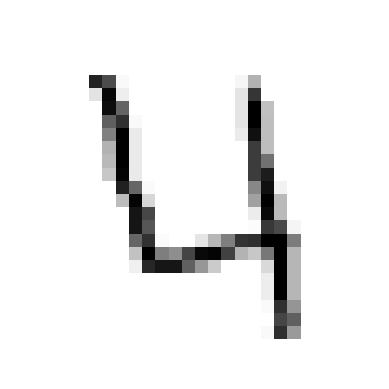

In [22]:
some_digit = df.iloc[3,1:].values
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

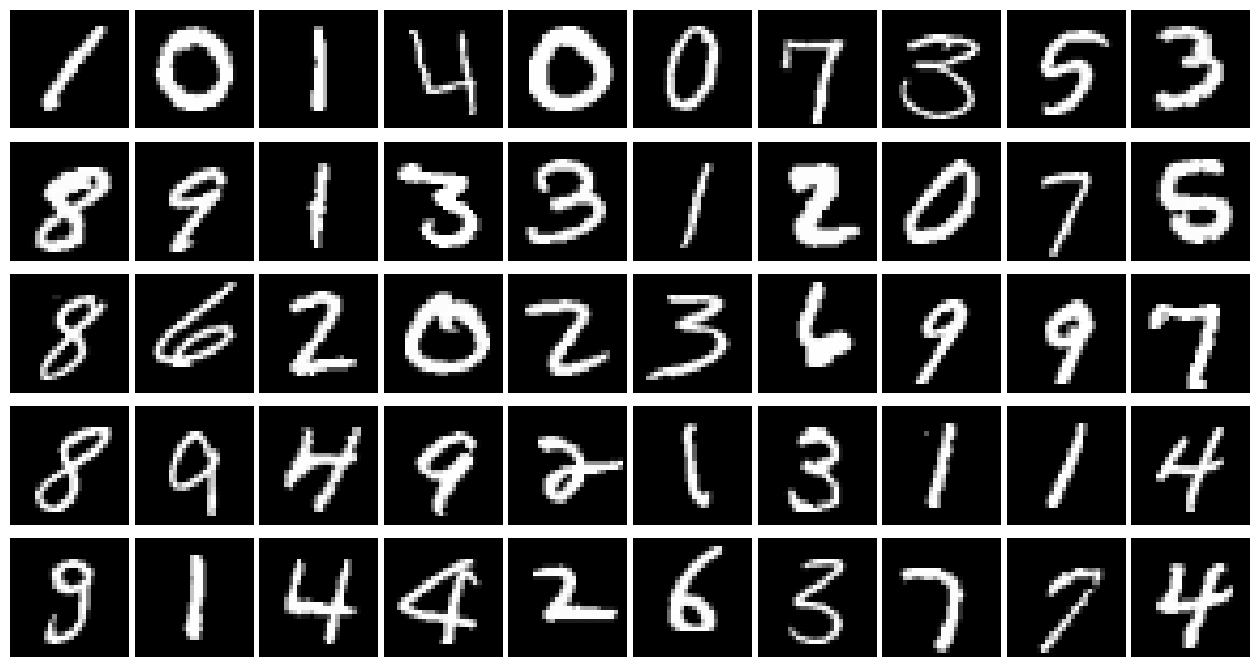

In [46]:
# Define grid dimensions 
n_rows = 5
n_cols = 10

# Create subplots with adjusted spacing
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*1.7))
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Plot digits from DataFrame `df`
for i, ax in enumerate(axes.flatten()):
    digit_data = df.iloc[i, 1:].values 
    digit_image = digit_data.reshape(28, 28)
    
    ax.imshow(digit_image, cmap='gray') 
    ax.axis('off')

plt.show()

In [44]:
X , y = df.iloc[:,1:] , df.iloc[:,0]

X_train , X_test , y_train , y_test = X[:32000],X[32000:] ,y[:32000] , y[32000:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [54]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train , y_train_5)

SGDClassifier(random_state=42)

In [62]:
cross_val_score(sgd_clf , X_train , y_train_5 , cv = 3, scoring = "accuracy")

array([0.94375176, 0.96540733, 0.95855991])

In [70]:
y_train_pred = cross_val_predict(sgd_clf , X_train ,y_train_5 , cv = 3 )

confusion_matrix(y_train_5 , y_train_pred)

array([[28468,   629],
       [  782,  2121]], dtype=int64)

In [76]:
precision_score(y_train_5 , y_train_pred)

0.7712727272727272

In [78]:
recall_score(y_train_5 , y_train_pred)

0.7306234929383396

In [84]:
f1_score(y_train_5 , y_train_pred)

0.7503980187511056

In [92]:
y_scores = cross_val_predict(sgd_clf , X_train , y_train_5 , cv = 3 , method = "decision_function")
y_scores

array([-23349.73457768, -61567.58066365, -16896.03058361, ...,
       -59714.66312526, -70085.48931843, -96091.06289627])

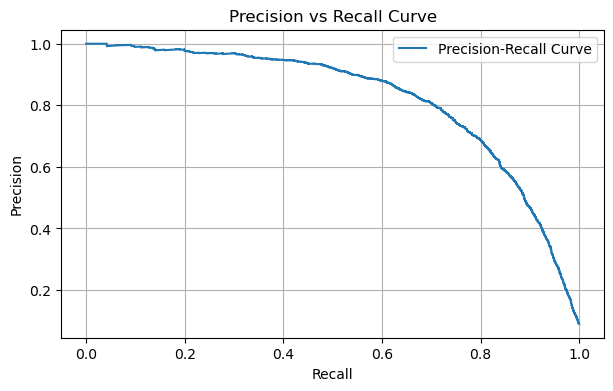

In [114]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

# Plot Precision vs Recall
plt.figure(figsize=(7, 4))
plt.plot(recall, precision, marker=',', label="Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall Curve')
plt.legend()
plt.grid()
plt.show()


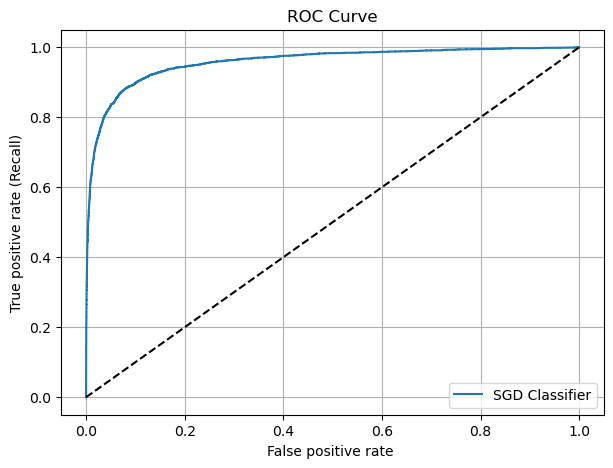

In [130]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr,tpr,thresholds = roc_curve(y_train_5 , y_scores)

plt.figure(figsize = (7,5))
plt.plot(fpr,tpr ,marker = ',' , label = 'SGD Classifier')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate ')
plt.ylabel('True positive rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [142]:
forest_clf = RandomForestClassifier(random_state =  42 )
y_probas = cross_val_predict(forest_clf , X_train , y_train_5 , cv =3 , method = 'predict_proba')
y_forest_scores = y_probas[:,1]

fpr_forest ,tpr_forest ,thresholds_forest = roc_curve(y_train_5 , y_forest_scores)

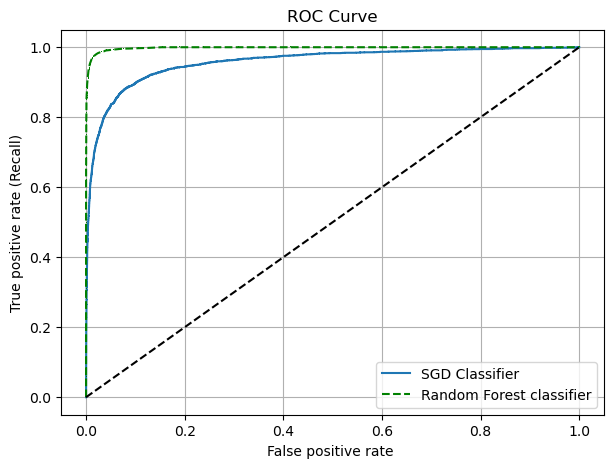

In [150]:
plt.figure(figsize = (7,5))
plt.plot(fpr,tpr ,marker = ',' , label = 'SGD Classifier')
plt.plot(fpr_forest , tpr_forest , 'g--' ,  marker = ',' ,label = 'Random Forest classifier')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate ')
plt.ylabel('True positive rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [166]:
sgd_auc_score = roc_auc_score(y_train_5 , y_scores)
forest_clf_auc_score =roc_auc_score(y_train_5 , y_forest_scores)

print(f'sgd_score = {sgd_auc_score}')
print(f'forest_score = {forest_clf_auc_score}')

sgd_score = 0.9579879579144394
forest_score = 0.9981435643930653
